In [2]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [4]:
roux_virgin_Ti64_r02 = pd.read_csv('2024-07-16 Roux_Virgin Ti64_R02 PyImageJ Results.csv')
roux_virgin_Ti64_r02.columns

Index([' ', 'Area', 'Mean', 'StdDev', 'Min', 'Max', 'X', 'Y', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'Feret',
       'IntDen', 'Median', 'Skew', 'Kurt', '%Area', 'RawIntDen', 'Slice',
       'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round',
       'Solidity'],
      dtype='object')

In [5]:
flowcam_virgin_Ti64_results_r02 = pd.read_csv('Full_Results_of_R02_2024_07_16.csv',  encoding='ISO-8859-1')
flowcam_virgin_Ti64_results_r02

,Name,Area (ABD) (µm²),Area (Filled) (µm²),Aspect Ratio,Average Blue,Average Green,Average Red,Biovolume (Cylinder) (µm³),Biovolume (P. Spheroid) (µm³),Biovolume (Sphere) (µm³),...,Sqrt Circularity,Sum Intensity,Symmetry,Time,Timestamp,Transparency,UUID,Volume (ABD) (µm³),Volume (ESD) (µm³),Width (µm)
0,2024-07-16 Roux_Virgin Ti64_R02,5798.67,5798.67,0.99,0.0,0.0,0.0,353971.71,329965.23,332166.86,...,0.96,64223.0,0.95,2024-07-16 13:40:00,2024-07-16 13:40:00,0.01,6D444D82439A11EF9A0750EBF6EE7050,332166.86,343594.83,85.17
1,2024-07-16 Roux_Virgin Ti64_R02,2275.73,2275.73,0.98,0.0,0.0,0.0,98067.41,80754.64,81666.41,...,0.98,39223.0,0.96,2024-07-16 13:40:00,2024-07-16 13:40:00,0.02,6D445106439A11EF9A0750EBF6EE7050,81666.41,86145.01,54.03
2,2024-07-16 Roux_Virgin Ti64_R02,5560.12,5560.12,0.92,0.0,0.0,0.0,334849.69,298269.35,311881.87,...,0.96,50029.0,0.94,2024-07-16 13:40:00,2024-07-16 13:40:00,0.02,6D445393439A11EF9A0750EBF6EE7050,311881.87,329313.31,79.67
3,2024-07-16 Roux_Virgin Ti64_R02,2623.57,2623.57,0.85,0.0,0.0,0.0,123838.99,92266.22,101088.89,...,0.96,61416.0,0.93,2024-07-16 13:40:00,2024-07-16 13:40:00,0.02,6D445614439A11EF9A0750EBF6EE7050,101088.89,108473.13,54.03
4,2024-07-16 Roux_Virgin Ti64_R02,5884.41,5884.41,0.99,0.0,0.0,0.0,374469.60,339198.93,339561.14,...,0.95,68168.0,0.93,2024-07-16 13:40:00,2024-07-16 13:40:00,0.02,6D4458C7439A11EF9A0750EBF6EE7050,339561.14,359526.00,87.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,2024-07-16 Roux_Virgin Ti64_R02,3384.17,3384.17,0.91,0.0,0.0,0.0,181940.74,141417.63,148095.72,...,0.94,53213.0,0.89,2024-07-16 13:41:53,2024-07-16 13:41:53,0.04,B09544EE439A11EF9A0750EBF6EE7050,148095.72,167036.38,63.19
1932,2024-07-16 Roux_Virgin Ti64_R02,1905.52,1905.52,0.96,0.0,0.0,0.0,78843.79,61240.79,62572.40,...,0.97,25307.0,0.96,2024-07-16 13:41:53,2024-07-16 13:41:53,0.02,B0954715439A11EF9A0750EBF6EE7050,62572.40,65900.96,48.54
1933,2024-07-16 Roux_Virgin Ti64_R02,2500.44,2500.44,0.97,0.0,0.0,0.0,115144.34,92398.99,94056.58,...,0.96,31721.0,0.90,2024-07-16 13:41:53,2024-07-16 13:41:53,0.03,B095493F439A11EF9A0750EBF6EE7050,94056.58,102163.93,55.86
1934,2024-07-16 Roux_Virgin Ti64_R02,3381.19,3381.19,0.92,0.0,0.0,0.0,169726.98,141250.91,147900.12,...,0.97,64895.0,0.96,2024-07-16 13:41:53,2024-07-16 13:41:53,0.02,B0954B9A439A11EF9A0750EBF6EE7050,147900.12,156090.76,63.19


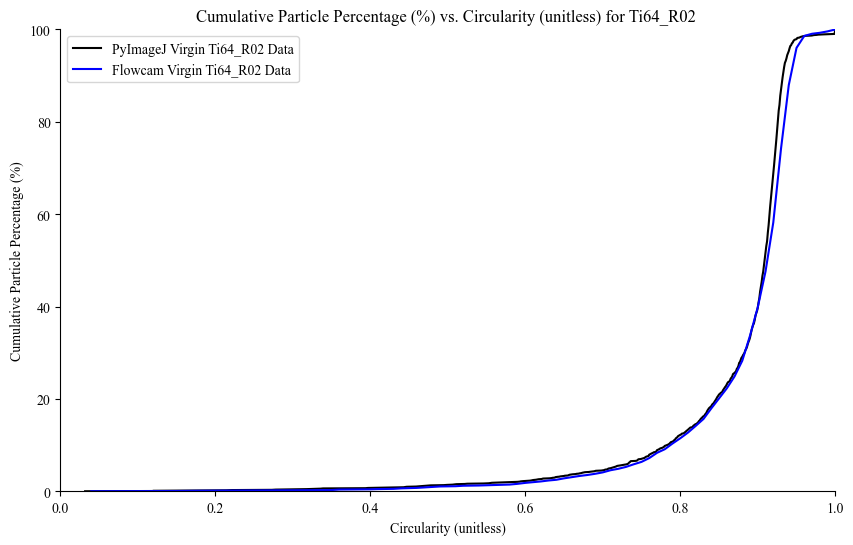

In [6]:
# calculate percentages and counts for pyimagej data
pyimagej_circularity_counts = roux_virgin_Ti64_r02['Circ.'].value_counts().sort_index()
pyimagej_circularity_counts = pyimagej_circularity_counts.cumsum()
pyimagej_circularity_percentage = (pyimagej_circularity_counts / pyimagej_circularity_counts.max()) * 100

#calculate percentages and counts for flowcam data
flowcam_circularity_counts = flowcam_virgin_Ti64_results_r02['Circularity'].value_counts().sort_index()
flowcam_circularity_counts = flowcam_circularity_counts.cumsum()
flowcam_circularity_percentage = (flowcam_circularity_counts / flowcam_circularity_counts.max()) * 100

# plot
plt.figure(figsize=(10, 6))
plt.plot(pyimagej_circularity_percentage.index, pyimagej_circularity_percentage.values, linestyle='-', color='black', label='PyImageJ Virgin Ti64_R02 Data')
plt.plot(flowcam_circularity_percentage.index, flowcam_circularity_percentage.values, linestyle='-', color='blue', label='Flowcam Virgin Ti64_R02 Data')
plt.legend()
plt.xlabel('Circularity (unitless)')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Circularity (unitless) for Ti64_R02 ')

plt.show()

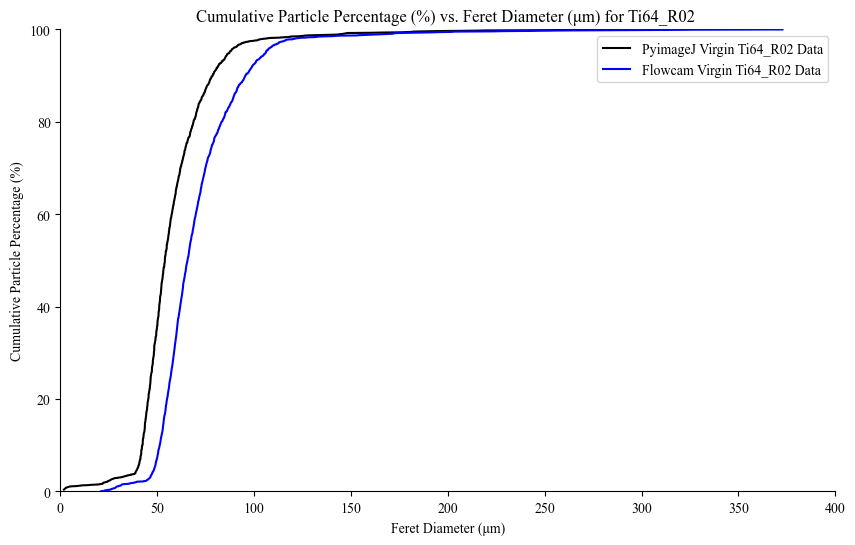

In [7]:
# calculate diameteres and percentages for pyimagej and flowcam
pyimagej_feret_counts = roux_virgin_Ti64_r02['Feret'].value_counts().sort_index()
pyimagej_feret_counts = pyimagej_feret_counts.cumsum()
pyimagej_feret_percentage = (pyimagej_feret_counts / pyimagej_feret_counts.max()) * 100

flowcam_feret_counts = flowcam_virgin_Ti64_results_r02['Diameter (ESD) (µm)'].value_counts().sort_index()
flowcam_feret_counts = flowcam_feret_counts.cumsum()
flowcam_feret_percentage = (flowcam_feret_counts / flowcam_feret_counts.max()) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pyimagej_feret_percentage.index, pyimagej_feret_percentage.values, linestyle='-', color='black', label='PyimageJ Virgin Ti64_R02 Data')
plt.plot(flowcam_feret_percentage.index, flowcam_feret_percentage.values, linestyle='-', color='blue', label='Flowcam Virgin Ti64_R02 Data')
plt.legend()
plt.xlabel('Feret Diameter (μm)')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Feret Diameter (μm) for Ti64_R02 ')

plt.show()

In [8]:
def calculate_cumulative_percentage(column):
    counts = column.value_counts().sort_index()
    cumulative_counts = counts.cumsum()
    cumulative_percentage = (cumulative_counts / cumulative_counts.max()) * 100
    return cumulative_percentage

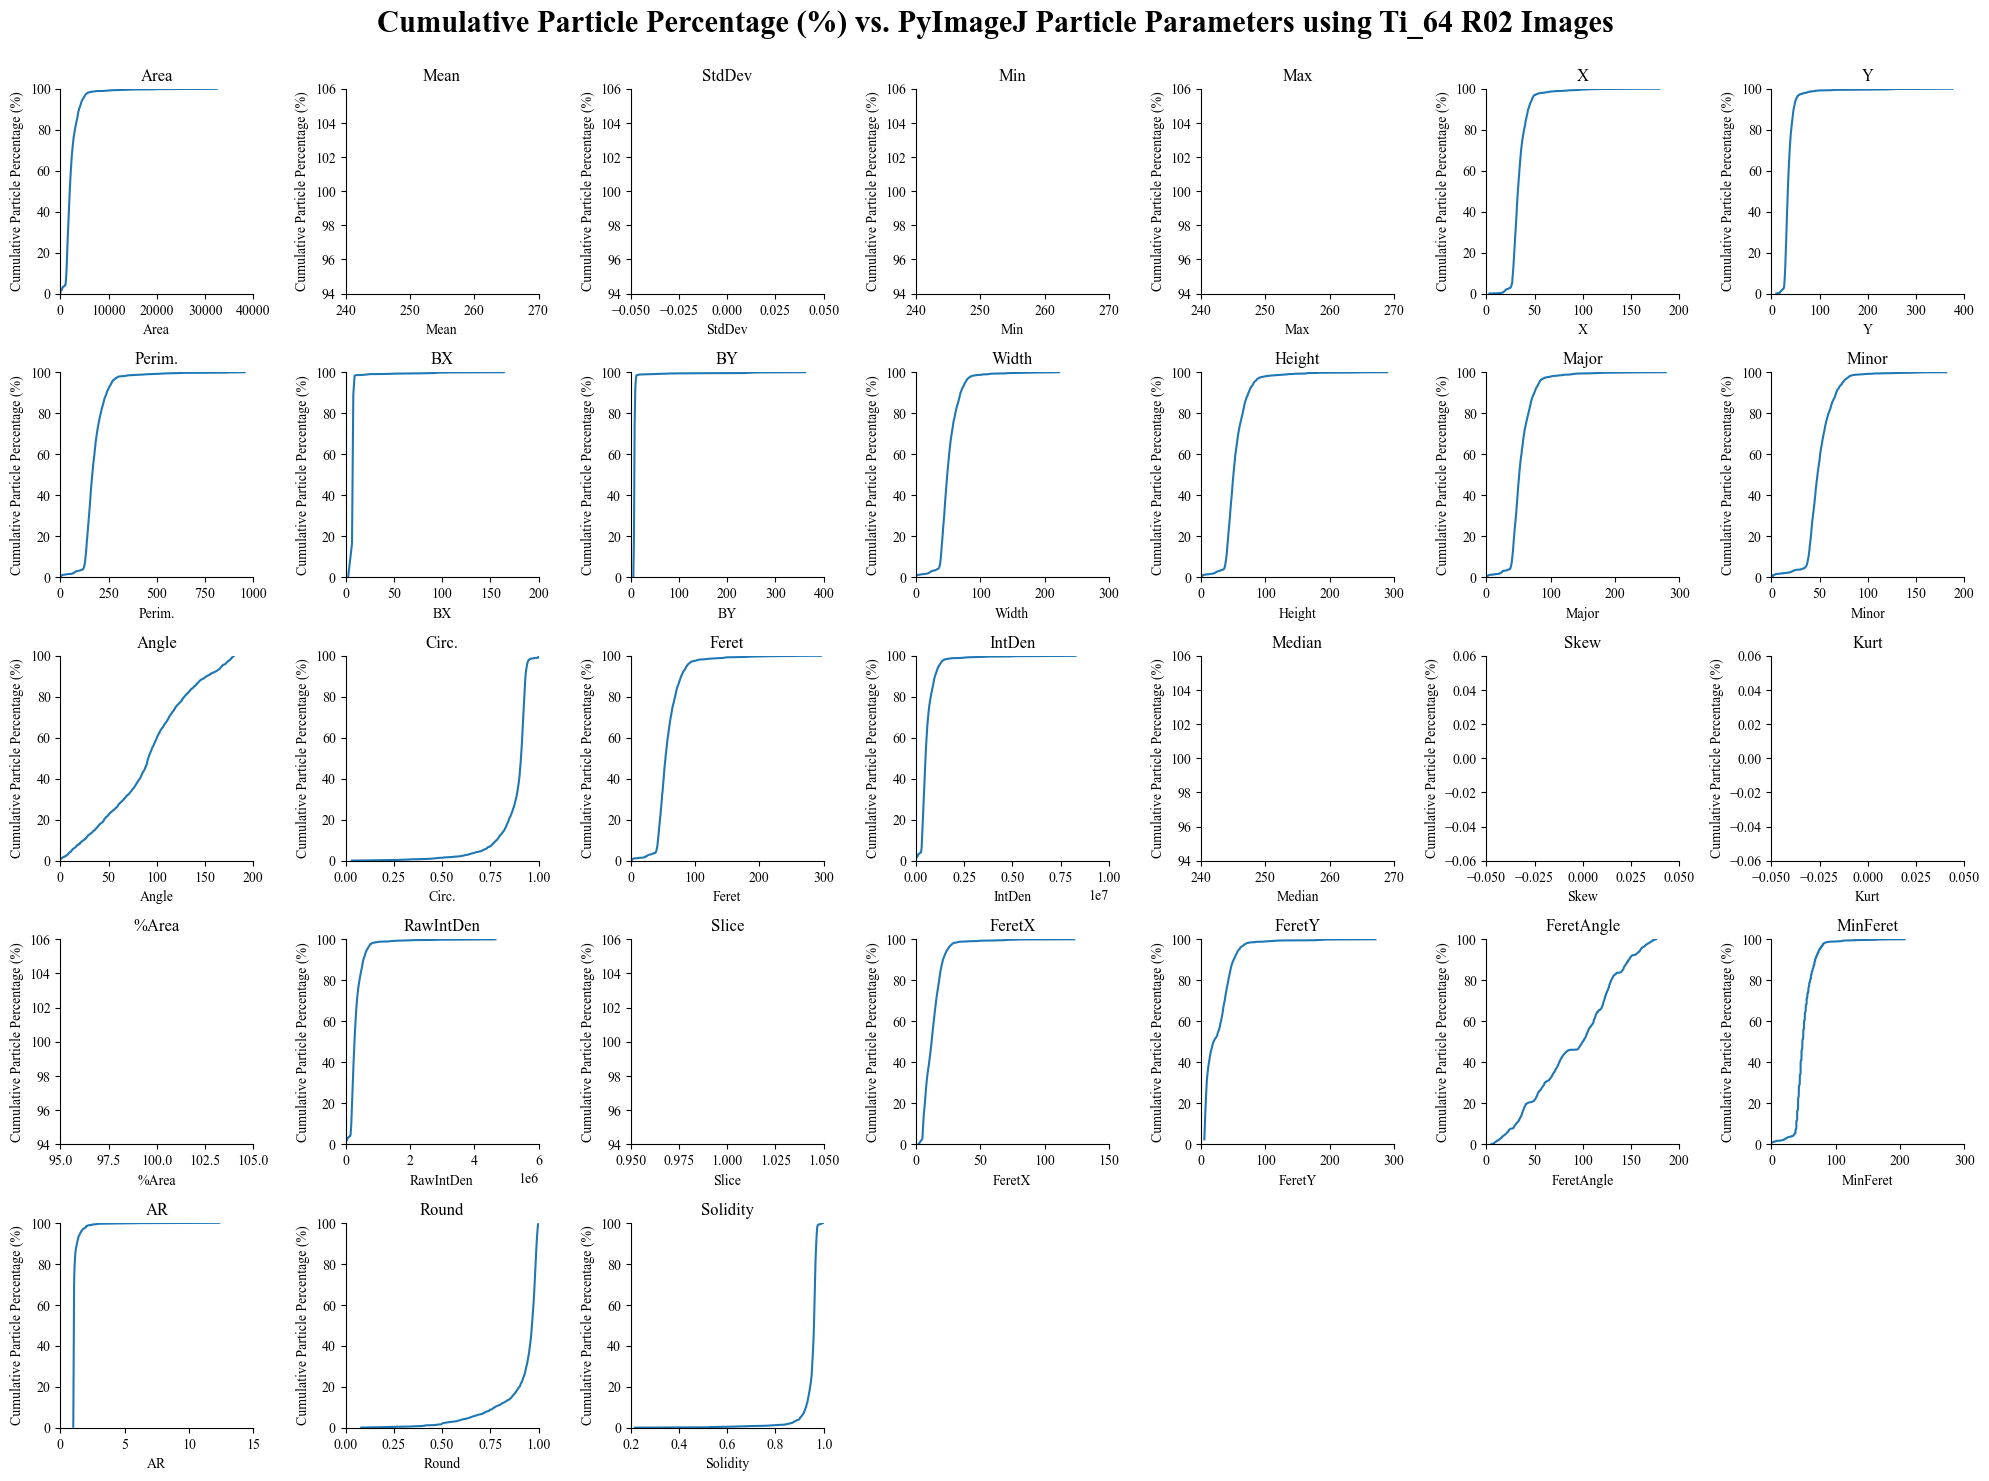

In [9]:
columns_to_plot = ['Area', 'Mean', 'StdDev', 'Min', 'Max', 'X', 'Y', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'Feret',
       'IntDen', 'Median', 'Skew', 'Kurt', '%Area', 'RawIntDen', 'Slice',
       'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round',
       'Solidity']

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col in roux_virgin_Ti64_r02.columns:
        # Calculate cumulative percentage
        cumulative_percentage = calculate_cumulative_percentage(roux_virgin_Ti64_r02[col])
        # Plot
        axes[i].plot(cumulative_percentage.index, cumulative_percentage, linestyle='-')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Cumulative Particle Percentage (%)')
        axes[i].set_title(col)


# Remove empty subplots if necessary
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Cumulative Particle Percentage (%) vs. PyImageJ Particle Parameters using Ti_64 R02 Images', fontsize=22, fontweight='bold', y=1.0)
fig.tight_layout()
plt.show()

In [10]:
# PyImageJ Table Comparison 
average_values = roux_virgin_Ti64_r02.mean()
std_dev_values = roux_virgin_Ti64_r02.std()

# Create a DataFrame to hold the table
pyimagej_comparison_table = pd.DataFrame({
    'Average': average_values,
    'Standard Deviation': std_dev_values
})

# Optionally, format the table
pyimagej_comparison_table = pyimagej_comparison_table.round(5)  # Round to 2 decimal places

# Print the table
pyimagej_comparison_table = pyimagej_comparison_table.drop(pyimagej_comparison_table.index[0])
pyimagej_comparison_table


,Average,Standard Deviation
Area,2362.03155,2000.67152
Mean,255.00000,0.00000
StdDev,0.00000,0.00000
Min,255.00000,0.00000
Max,255.00000,0.00000
X,34.80434,10.26167
Y,37.13123,19.76572
Perim.,177.82407,70.17342
BX,8.67517,7.97739
BY,9.82123,18.72904


In [11]:
df_filtered = flowcam_virgin_Ti64_results_r02.select_dtypes(include=['float'])
df_filtered

,Area (ABD) (µm²),Area (Filled) (µm²),Aspect Ratio,Average Blue,Average Green,Average Red,Biovolume (Cylinder) (µm³),Biovolume (P. Spheroid) (µm³),Biovolume (Sphere) (µm³),Calibration Factor,...,Sphere Count,Sphere Unknown (µm³),Sphere Volume (µm³),Sqrt Circularity,Sum Intensity,Symmetry,Transparency,Volume (ABD) (µm³),Volume (ESD) (µm³),Width (µm)
0,5798.67,5798.67,0.99,0.0,0.0,0.0,353971.71,329965.23,332166.86,1.83,...,0.0,0.0,0.0,0.96,64223.0,0.95,0.01,332166.86,343594.83,85.17
1,2275.73,2275.73,0.98,0.0,0.0,0.0,98067.41,80754.64,81666.41,1.83,...,0.0,0.0,0.0,0.98,39223.0,0.96,0.02,81666.41,86145.01,54.03
2,5560.12,5560.12,0.92,0.0,0.0,0.0,334849.69,298269.35,311881.87,1.83,...,0.0,0.0,0.0,0.96,50029.0,0.94,0.02,311881.87,329313.31,79.67
3,2623.57,2623.57,0.85,0.0,0.0,0.0,123838.99,92266.22,101088.89,1.83,...,0.0,0.0,0.0,0.96,61416.0,0.93,0.02,101088.89,108473.13,54.03
4,5884.41,5884.41,0.99,0.0,0.0,0.0,374469.60,339198.93,339561.14,1.83,...,0.0,0.0,0.0,0.95,68168.0,0.93,0.02,339561.14,359526.00,87.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,3384.17,3384.17,0.91,0.0,0.0,0.0,181940.74,141417.63,148095.72,1.83,...,0.0,0.0,0.0,0.94,53213.0,0.89,0.04,148095.72,167036.38,63.19
1932,1905.52,1905.52,0.96,0.0,0.0,0.0,78843.79,61240.79,62572.40,1.83,...,0.0,0.0,0.0,0.97,25307.0,0.96,0.02,62572.40,65900.96,48.54
1933,2500.44,2500.44,0.97,0.0,0.0,0.0,115144.34,92398.99,94056.58,1.83,...,0.0,0.0,0.0,0.96,31721.0,0.90,0.03,94056.58,102163.93,55.86
1934,3381.19,3381.19,0.92,0.0,0.0,0.0,169726.98,141250.91,147900.12,1.83,...,0.0,0.0,0.0,0.97,64895.0,0.96,0.02,147900.12,156090.76,63.19


In [12]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to avoid line breaks
pd.set_option('display.max_colwidth', None)

In [13]:
# Calculate average and standard deviation
average_values = df_filtered.mean()
std_dev_values = df_filtered.std()

# Create a DataFrame to hold the table
flowcam_comparison_table = pd.DataFrame({
    'Average': average_values,
    'Standard Deviation': std_dev_values
})

flowcam_comparison_table = flowcam_comparison_table.round(5)

flowcam_comparison_table


,Average,Standard Deviation
Area (ABD) (µm²),3984.75675,3611.78637
Area (Filled) (µm²),3985.67873,3616.93139
Aspect Ratio,0.91715,0.10621
Average Blue,0.00000,0.00000
Average Green,0.00000,0.00000
Average Red,0.00000,0.00000
Biovolume (Cylinder) (µm³),238943.69365,323419.08581
Biovolume (P. Spheroid) (µm³),219049.90768,506289.81189
Biovolume (Sphere) (µm³),228693.66587,534621.67324
Calibration Factor,1.83000,0.00000
